### This notebook trains SVMs and RFs on GESIS vs. GBS.

In [8]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

df = pd.read_csv('preprocessed1.csv')

x = df[df.columns[:-1]]
y = df['Umfrage']

In [18]:
conf = len(y)*[0]

for j in range(20):
    
    clf = RandomForestClassifier(n_estimators=200+10*j, max_depth= j*1+1, random_state=5)
    y_pred = cross_val_predict(clf,x,y,cv=10)

    mat = confusion_matrix(y,y_pred)
    print(mat)
    print(str(int(mat[1][0] * 566/3800))+' statt '+str(mat[0][0]))
    print('----------------------')
    
    for i in range(len(y)):
        if(y_pred[i]=='GBS'):
            conf[i] = conf[i] + 1

[[   0  566]
 [   0 3800]]
0 statt 0
----------------------
[[   0  566]
 [   0 3800]]
0 statt 0
----------------------
[[   0  566]
 [   0 3800]]
0 statt 0
----------------------
[[   0  566]
 [   0 3800]]
0 statt 0
----------------------
[[   0  566]
 [   0 3800]]
0 statt 0
----------------------
[[   0  566]
 [   0 3800]]
0 statt 0
----------------------
[[   0  566]
 [   0 3800]]
0 statt 0
----------------------
[[   1  565]
 [   1 3799]]
0 statt 1
----------------------
[[   5  561]
 [   8 3792]]
1 statt 5
----------------------
[[   7  559]
 [  15 3785]]
2 statt 7
----------------------
[[  10  556]
 [  17 3783]]
2 statt 10
----------------------
[[  11  555]
 [  21 3779]]
3 statt 11
----------------------
[[  13  553]
 [  26 3774]]
3 statt 13
----------------------
[[  12  554]
 [  32 3768]]
4 statt 12
----------------------
[[  16  550]
 [  31 3769]]
4 statt 16
----------------------
[[  20  546]
 [  40 3760]]
5 statt 20
----------------------
[[  21  545]
 [  48 3752]]
7 statt

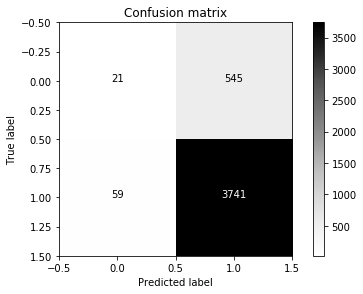

In [22]:
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes= df.columns[:-1],
                      title='Confusion matrix')

plt.savefig('ConfusionMatrix1')
plt.show()

In [23]:
from sklearn import svm


# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


,Zurueckhaltend,leicht Vertrauen,Faulheit,Entspannt,wenig kuenstlerisches Interesse,Gesellig,Andere kritisieren,Gruendlich,Nervoes,Phantasievoll,Umfrage
0,2.0,4.0,2.0,2.0,1.0,5.0,4.0,4.0,3.0,5.0,GBS
1,3.0,3.0,2.0,2.0,1.0,4.0,2.0,5.0,1.0,5.0,GBS
2,4.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,3.0,4.0,GBS
3,4.0,4.0,2.0,4.0,4.0,2.0,3.0,4.0,2.0,3.0,GBS
4,2.0,5.0,2.0,4.0,2.0,4.0,2.0,5.0,2.0,5.0,GBS
5,2.0,2.0,1.0,1.0,2.0,4.0,2.0,5.0,5.0,5.0,GBS
6,3.0,4.0,4.0,4.0,5.0,2.0,3.0,4.0,2.0,1.0,GBS
7,5.0,4.0,1.0,4.0,2.0,2.0,3.0,5.0,4.0,4.0,GBS
8,4.0,4.0,1.0,4.0,2.0,3.0,2.0,4.0,2.0,3.0,GBS
9,4.0,4.0,2.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,GBS
